#  Two Sample T-Test Coach Lab

Outcomes:

    1.  Practice importing data into pandas dataframe
    2.  Practice developing data-based questions
    3.  Practice data exploration
    4.  Practice conducting two sample t-tests


### Step 1- Import data

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
heart_data=pd.read_csv('heart.csv')

In [8]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Step 2- Develop Data-Based Question

Research Question:  Do women have higher rates of heart disease than men?
                   Is there a difference between the ages of men and women who have heart disease?
                   Is there a relationship between age and cholesterol level?


Alternate Hypothesis:
        There is a difference between the mean of men's cholesterol level's and women's cholesterol levels.

Null Hypothesis:
        There is no difference between the mean of men's cholesterol level and women's cholesterol level.

### Step 3- Explore data & clean

In [29]:
#Steps on examining data for null values or weird values?

heart_red=heart_data.loc[heart_data.chol<500][['target', 'chol']]
heart_red.head(20)

,target,chol
0,0,212
1,0,203
2,0,174
3,0,203
4,0,294
5,1,248
6,0,318
7,0,289
8,0,249
9,0,286


In [30]:
heart_red.groupby('target').describe()

chol                                                          
        count        mean        std    min    25%    50%    75%    max
target                                                                 
0       499.0  251.292585  49.558924  131.0  217.0  249.0  284.0  409.0
1       523.0  239.126195  47.150157  126.0  207.5  234.0  265.0  417.0

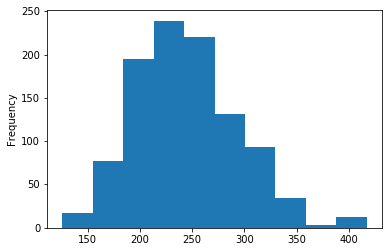

In [31]:
heart_red['chol'].plot(kind='hist')

In [32]:
import matplotlib.pyplot as plt

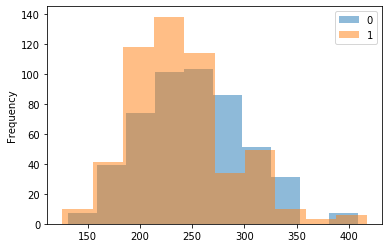

In [33]:
heart_red.groupby('target').chol.plot(kind='hist', alpha=.5)
plt.legend()

In [34]:
heart_no=heart_red.loc[heart_red.target==0]
heart_yes=heart_red.loc[heart_red.target==1]

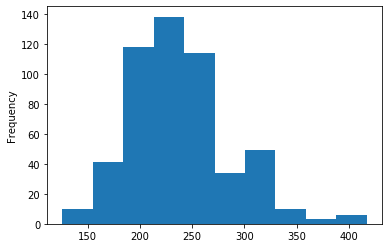

In [35]:
heart_yes.chol.plot(kind='hist')

In [36]:
#Steps for data cleaning

In [37]:
#Data visualizations/exploration


### Step 4- T-Test to Answer Question

In [38]:
#Steps to conduct t-test for difference of sample means

from scipy.stats import ttest_ind

no_chol=heart_no['chol']
yes_chol=heart_yes['chol']


In [40]:
type(no_chol)

pandas.core.series.Series

In [41]:
ttest_ind(no_chol, yes_chol, equal_var=True)

Ttest_indResult(statistic=4.021795558021059, pvalue=6.201576997605328e-05)

In [42]:
from scipy.stats import levene

In [43]:
levene(no_chol, yes_chol)

LeveneResult(statistic=3.798563940143811, pvalue=0.05157040573104699)